In [1]:
import sys, os
p = os.path.abspath('..')
sys.path.insert(1, p)

pp = os.path.abspath('../../visualization')
sys.path.insert(1, pp)

In [28]:
from gc import collect

import pickle
import lib.stats.stats as st
from utils.statistics import *
from utils.settings import set_matplotlib
from distribution_collector import (collect_topic_distributions,
                                get_top_and_bottom_topics,
                                extract_specific_topics)
from constants import CONSTANTS
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess


In [3]:
data_dir = f'../../visualization/{CONSTANTS.lda_monthly_data_dir[3:]}'
output_dir = './fig/'
date_range = 'Weekly'
model = 'LDA'

In [4]:
window = 7
top_and_bottom_topics = get_top_and_bottom_topics(data_dir)
weekly_topic_distributions_wo = collect_topic_distributions(window=window,
                                                            data_dir=data_dir, weekday_list = None, options=None)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>get_monthly_topics_counts
['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '20

In [5]:
weekly_topic_distributions = collect_topic_distributions(window=window,
                                                            data_dir=data_dir, weekday_list = None, options=None)

['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '2022-09-07 00:00:00', '2022-09-14 00:00:00', '2022-09-21 00:00:00', '2022-09-2

In [23]:
ginis = list(map(lambda x: calculate_gini(list(x.values())), weekly_topic_distributions))

In [24]:
entropies = list(map(lambda x: calculate_entropy(list(x.values())), weekly_topic_distributions))

In [25]:
gini_entropy_dict = {'Gini Coefficient' : ginis, 'Entropy' : entropies}

In [6]:
top_10, bottom_10 = top_and_bottom_topics

top_10_distribution = \
    list(map(lambda d: extract_specific_topics(d, top_10), weekly_topic_distributions))
top_10_to_draw = {topic: [] for topic in top_10}
for topic in top_10:
    for dict_ in top_10_distribution:
        top_10_to_draw[topic].append(dict_[topic])
top_10_proportion = list(map(lambda d: sum(d.values()),
                                top_10_distribution))

bottom_10_distribution = \
    list(map(lambda d: extract_specific_topics(d, bottom_10), weekly_topic_distributions))
bottom_10_to_draw = {topic: [] for topic in bottom_10}
for topic in bottom_10:
    for dict_ in bottom_10_distribution:
        bottom_10_to_draw[topic].append(dict_[topic])
bottom_10_proportion = list(map(lambda d: sum(d.values()),
                                bottom_10_distribution))

In [ ]:
proportion_dict = {'Top 20% Topics' : top_10_to_draw
                                        ,'Bottom 20% Topics' : bottom_10_to_draw}

In [15]:
import seaborn as sns
color_list = [[ 
   "#4575b4",  # deep blue
    "#91bfdb",  # light blue
    "#e0f3f8",  # pale blue
    "#a6d96a",  # light green
    "#1a9850",  # green
    "#d9ef8b",  # lime yellow
    "#fee08b",  # beige
    "#fdae61",  # soft orange
    "#f46d43",  # coral orange
    "#d73027"   # muted red
    ],
   [
    "#8c510a",  # dark brown
    "#bf812d",  # brown-gold
    "#dfc27d",  # sand yellow
    "#f6e8c3",  # beige
    "#c7eae5",  # light aqua
    "#80cdc1",  # teal
    "#35978f",  # muted teal
    "#01665e",  # deep green
    "#003c30",  # near-black green
    "#f5f5f5"   # pale gray (neutral base)
]]


In [38]:
proportion_dict = {'Top 20% Topics' : top_10_to_draw
                ,   'Bottom 20% Topics' : bottom_10_to_draw}

In [39]:
rel_week = np.array(np.arange(-52, 52))

In [40]:
st_0 = st.Stats(rel_week, entropies, 2, 0.95)

In [41]:
F_stat_0, p_value_0 = st_0.chow_test()

In [42]:
print(p_value_0)

2.3188895248438257e-11


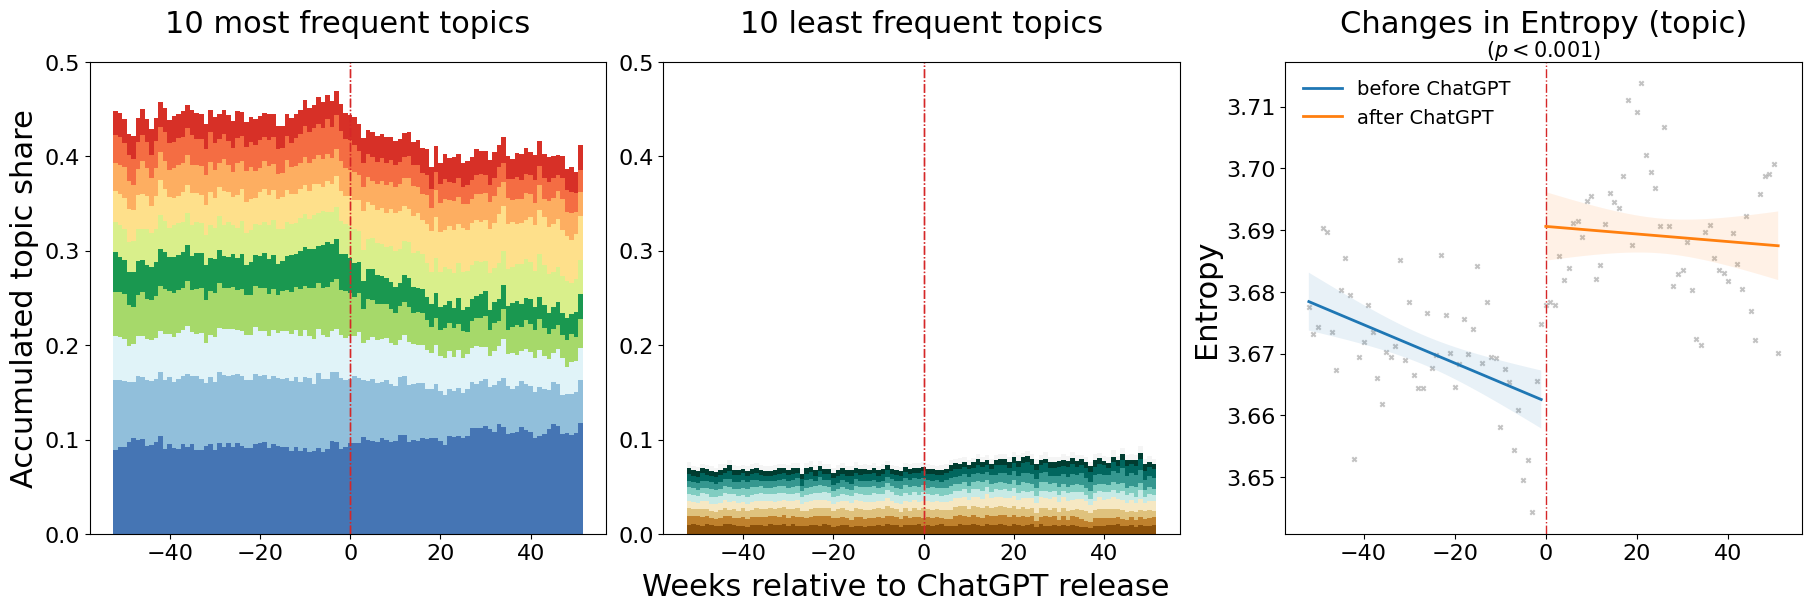

In [47]:

### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False
# g_num  = len(proportion_dict.items())

fig, axs = plt.subplots(1, 3, figsize = (18, 6), constrained_layout=True)
colors = plt.get_cmap('tab20').colors 


for x, (title, proportion) in enumerate(stackedbar_dict.items()):
    y_length = len(list(proportion.values())[0])
    bottom = np.array([0.0]*y_length)
    x_rel, divider = get_dist_x_div(list(proportion.values())[0])
    color_idx_list = [xx for xx in range(len(colors)) if xx % 2 == x]
    
    for idx, (topic, count) in enumerate(proportion.items()):    
        # p = axs[x].bar(x_rel, count, bottom=bottom, label=topic, color = colors[color_idx_list[idx]])
        p = axs[x].bar(x_rel, count, bottom=bottom, label=topic, color = color_list[x][idx], width=1.0, align='center')
        bottom += count
    axs[x].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
    
    axs[x].set_ylim(0, 0.5)
    # 보조선 및 제목/레이블 등
    axs[x].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
    axs[x].text(0.5, 1.05, f"{title}",
            ha='center', va='bottom', fontsize=22, transform=axs[x].transAxes)
    axs[x].text(0.5, 1.00, "",
        ha='center', va='bottom', fontsize=15, transform=axs[x].transAxes)  

    axs[x].tick_params(axis='x', labelsize=16)
    axs[x].tick_params(axis='y', labelsize=16)
    
idx = 2
list_ = gini_entropy_dict['Entropy']
x_rel, divider = get_dist_x_div(list_)

reg_bf = calc_regression_with_ci(x_rel[:divider], list_[:divider])
reg_af = calc_regression_with_ci(x_rel[divider:], list_[divider:])

reg_bf_summary = reg_bf["pred_summary"]
reg_af_summary = reg_af["pred_summary"]

# 회귀선 (예측값)
reg_bf_y_pred = reg_bf_summary["mean"]
reg_af_y_pred = reg_af_summary["mean"]
# 신뢰구간
reg_bf_ci_lower = reg_bf_summary["mean_ci_lower"]
reg_bf_ci_upper = reg_bf_summary["mean_ci_upper"]

reg_af_ci_lower = reg_af_summary["mean_ci_lower"]
reg_af_ci_upper = reg_af_summary["mean_ci_upper"]

p_value_txt = '($p < 0.001$)' if p_value_0 <0.001 else '($p = {p_value_0:.3f}$)'

axs[idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
axs[idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
# axs[idx].set_ylabel(f"{measure} of Topic Distribution", fontsize = 10)
axs[idx].plot(x_rel[:divider], reg_bf_y_pred, linewidth=2, label = 'before ChatGPT')
axs[idx].plot(x_rel[divider:], reg_af_y_pred, linewidth=2, label = 'after ChatGPT')

axs[idx].fill_between(x_rel[:divider], reg_bf_ci_lower, reg_bf_ci_upper, alpha=0.1)
axs[idx].fill_between(x_rel[divider:], reg_af_ci_lower, reg_af_ci_upper, alpha=0.1)

axs[idx].legend(frameon=False, loc='best', fontsize=14)
# axs[idx].set_title(f"Changes in Entropy (topic){p_value_txt}", fontsize=25)
# axs[idx].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

axs[idx].tick_params(axis='x', labelsize=16)
axs[idx].tick_params(axis='y', labelsize=16)


axs[idx].text(0.5, 1.05, f"Changes in Entropy (topic)",
            ha='center', va='bottom', fontsize=22, transform=axs[idx].transAxes)

axs[idx].text(0.5, 1.00, f"{p_value_txt}",
        ha='center', va='bottom', fontsize=15, transform=axs[idx].transAxes)  
        

axs[0].set_ylabel("Accumulated topic share", fontsize = 22)
axs[2].set_ylabel(f"Entropy", fontsize = 22)


axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)

axs[0].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)

axs[0].set_ylabel("Accumulated topic share", fontsize = 22)

fig.supxlabel("Weeks relative to ChatGPT release", fontsize=22) 

plt.savefig(f"{output_dir}SI_4.A.2.Fig12.png", dpi=300, bbox_inches='tight')
plt.show();